In [196]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os 
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [197]:
load_dotenv("APIKeys.env")

True

In [198]:
map_box_api = os.getenv("mbapi")
map_box_api

'pk.eyJ1IjoianNlaWRtYW4zMCIsImEiOiJja3NxOGNlbmQwYWE3MnZvM2JnaHJsamRoIn0.WHIiDArAKXnm4CFvwGH0Ow'

In [199]:
file_path = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/06-PyViz/Instructions/Starter_Code/Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()


,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [200]:
sales10 = sfo_data['housing_units'].groupby('year').mean()

In [201]:
sales10

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [202]:
sales10.to_csv("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/06-PyViz/Instructions/sales10")
               

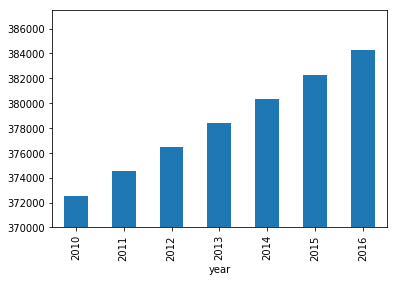

In [203]:
yaxis=[370000,387500]

sales10.plot(kind="bar",ylim=yaxis)



In [204]:
sfprice = sfo_data['gross_rent'].groupby('year').mean()
print(sfprice)

sfsqft = sfo_data['sale_price_sqr_foot'].groupby('year').mean()
print(sfsqft)

year
2010    1239
2011    1530
2012    2324
2013    2971
2014    3528
2015    3739
2016    4390
Name: gross_rent, dtype: int64
year
2010    369.344353
2011    341.903429
2012    399.389968
2013    483.600304
2014    556.277273
2015    632.540352
2016    697.643709
Name: sale_price_sqr_foot, dtype: float64


In [205]:
sfpriceandsqft = pd.concat([sfsqft,sfprice] , axis = "columns" , join="inner")
columnames=["sale_price_sqr_foot","gross_rent"]
sfpriceandsqft.columns=columnames
sfpriceandsqft

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


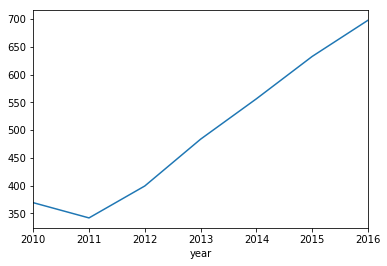

In [206]:
sfpriceandsqft["sale_price_sqr_foot"].plot()


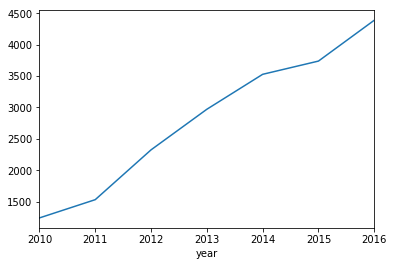

In [207]:
sfpriceandsqft["gross_rent"].plot()


In [208]:
sfforavgprice = sfo_data
sfforavgprice.reset_index(inplace=True)
sfforavgprice


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [209]:
sfforavgpriceplot = sfforavgprice.hvplot(kind="line",x="year",y="sale_price_sqr_foot",groupby="neighborhood")
sfforavgpriceplot

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [210]:
sfforavgprice.hvplot(kind="line",x="year",y="gross_rent",groupby="neighborhood")


:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

In [211]:
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.reset_index(inplace=True)
sfo_data.drop(columns='year',inplace=True)

In [212]:
sfo_data

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,291.182945,372560,1239
1,Anza Vista,267.932583,372560,1239
2,Bayview,170.098665,372560,1239
3,Buena Vista Park,347.394919,372560,1239
4,Central Richmond,319.027623,372560,1239
5,Central Sunset,418.172493,372560,1239
6,Corona Heights,369.359338,372560,1239
7,Cow Hollow,569.379968,372560,1239
8,Croker Amazon,165.645730,372560,1239
9,Diamond Heights,456.930822,372560,1239


In [213]:
sfsqftNOText = sfo_data[['neighborhood','sale_price_sqr_foot']]
sales10NOText = sfo_data['housing_units']
sfpriceNOText = sfo_data['gross_rent']

print(sfsqftNOText)
print(sales10NOText)
print(sfpriceNOText)

                      neighborhood  sale_price_sqr_foot
0                     Alamo Square           291.182945
1                       Anza Vista           267.932583
2                          Bayview           170.098665
3                 Buena Vista Park           347.394919
4                 Central Richmond           319.027623
5                   Central Sunset           418.172493
6                   Corona Heights           369.359338
7                       Cow Hollow           569.379968
8                    Croker Amazon           165.645730
9                  Diamond Heights           456.930822
10                       Downtown            241.804552
11   Eureka Valley/Dolores Heights           403.118313
12                       Excelsior           364.928336
13        Financial District North           401.749967
14        Financial District South           162.821210
15                   Forest Knolls           209.049327
16                       Glen Park           715

In [214]:
sfallNOText = pd.concat([sfsqftNOText,sales10NOText,sfpriceNOText] , axis = "columns" , join="inner")
columnames=['neighborhood',"sale_price_sqr_foot","housing_units","gross_rent"]
sfallNOText.columns=columnames

sfallNOText

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,291.182945,372560,1239
1,Anza Vista,267.932583,372560,1239
2,Bayview,170.098665,372560,1239
3,Buena Vista Park,347.394919,372560,1239
4,Central Richmond,319.027623,372560,1239
5,Central Sunset,418.172493,372560,1239
6,Corona Heights,369.359338,372560,1239
7,Cow Hollow,569.379968,372560,1239
8,Croker Amazon,165.645730,372560,1239
9,Diamond Heights,456.930822,372560,1239


In [215]:
grouper = ["neighborhood"]

sftop10= sfallNOText.groupby(grouper).mean()

sftop10 = sftop10.sort_values(['sale_price_sqr_foot'],ascending=False)
sf10top10=sftop10.head(10)
sf10top10

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


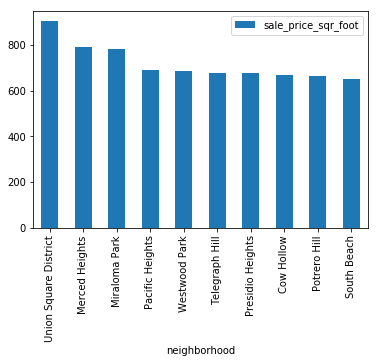

In [216]:
sf10top10.reset_index(inplace=True)
sf10top10.plot(kind='bar',x="neighborhood",y='sale_price_sqr_foot')

In [217]:
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.reset_index(inplace=True)

sfowns = sfo_data

sfowns = sfowns.groupby("neighborhood").mean()

sfowns["year"] = sfowns["year"].round(0).astype(int)

sfowns.reset_index(inplace=True)
sfowns

,neighborhood,year,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,2013,366.020712,378401.00,2817.285714
1,Anza Vista,2013,373.382198,379050.00,3031.833333
2,Bayview,2012,204.588623,376454.00,2318.400000
3,Bayview Heights,2015,590.792839,382295.00,3739.000000
4,Bernal Heights,2014,576.746488,379374.50,3080.333333
5,Buena Vista Park,2013,452.680591,378076.50,2698.833333
6,Central Richmond,2013,394.422399,378401.00,2817.285714
7,Central Sunset,2013,423.687928,378401.00,2817.285714
8,Clarendon Heights,2012,487.244886,376454.00,2250.500000
9,Corona Heights,2012,587.539067,377232.80,2472.000000


In [218]:
sfowns.hvplot.bar(x="year",y=["sale_price_sqr_foot","gross_rent"],groupby="neighborhood")



:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

In [219]:
neigh_file_path = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/06-PyViz/Instructions/Starter_Code/Data/neighborhoods_coordinates.csv")
neighcoords= pd.read_csv(neigh_file_path)
print(neighcoords.count())
print(sfowns.count())


Neighborhood    73
Lat             73
Lon             73
dtype: int64
neighborhood           73
year                   73
sale_price_sqr_foot    73
housing_units          73
gross_rent             73
dtype: int64


In [220]:
allbyneigh = sfo_data.groupby("neighborhood").mean()
allbyneigh["year"]=allbyneigh["year"].round(0).astype(int)
allbyneigh
print(neighcoords.count())
print(allbyneigh.count())

Neighborhood    73
Lat             73
Lon             73
dtype: int64
year                   73
sale_price_sqr_foot    73
housing_units          73
gross_rent             73
dtype: int64


In [221]:
neighcoords.set_index("Neighborhood",inplace=True)

In [222]:
neighcoords

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050
Buena Vista Park,37.768160,-122.439330
Central Richmond,37.777890,-122.445170
Central Sunset,37.749610,-122.489990
Clarendon Heights,37.753310,-122.447030


In [223]:
sfwithcoords = pd.concat([allbyneigh,neighcoords] , axis = 'columns' , join="inner")
sfwithcoords.head()


,year,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
Alamo Square,2013,366.020712,378401.0,2817.285714,37.791012,-122.402100
Anza Vista,2013,373.382198,379050.0,3031.833333,37.779598,-122.443451
Bayview,2012,204.588623,376454.0,2318.400000,37.734670,-122.401060
Bayview Heights,2015,590.792839,382295.0,3739.000000,37.728740,-122.410980
Buena Vista Park,2013,452.680591,378076.5,2698.833333,37.768160,-122.439330


In [224]:
px.set_mapbox_access_token(map_box_api)

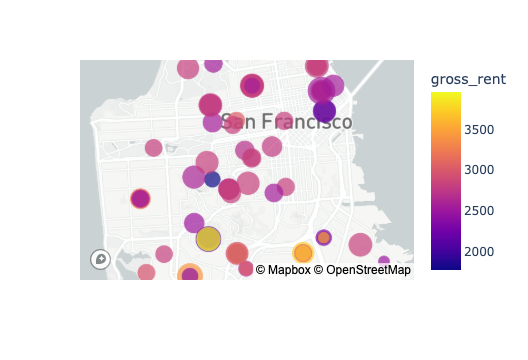

In [225]:
sfrealmap = px.scatter_mapbox(sfwithcoords,
                              lat=sfwithcoords['Lat'],
                              lon=sfwithcoords['Lon'],
                              zoom=10.5,
                              color=sfwithcoords['gross_rent'],
                              size=sfwithcoords['sale_price_sqr_foot']
                             )
sfrealmap.show()